### Quantum Tech

Yogi Agusta, Rachenda Pandu, Andika Virdian

[Sumber data City of Philadelphia](https://www.kaggle.com/adebayo/philadelphia-buildings-database) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
    - Describe Data masing-masing kategori
    - Describe data secara statistik masing-masing kategori
3. Data Cleaning dan Data Preprocessing
    - EDA
        1. Load Dataset
        2. Menghitung Missing data
        3. Data Prepocessing
Drop Data
Mengisi NaN dengan Data Lain
Mengisi NaN dengan Median
Mengisi NaN dengan Modus
        4. Feature Enginering
        5. Data Preprocessing
        6. Normalized Price
            melakukakan Normalisai market value - Kolom market value ditransform menggunakan log
        7. Output
        8. Data Nominal
        9. Data Visualization
4. Modeling
5. Conclusion
6. Recommendation

****

### ***1. Business Problem Understanding***

**Context**

OPA (Office of Property Assesstment) merupakan lembaga pemerintahan Kota Philadelphia yang memiliki wewenang dalam penentuan harga properti di Philadephia. Sejatinya properti di Philadelphia adalah salah satu sektor sumber pendapatan untuk Kota Phialdephia. Melansir dari web Reclaim Philadelphia (https://www.reclaimphiladelphia.org/blog/2019/2/17/how-are-our-schools-funded), pemasukan dari properti adalah pemasukan yang digunakan untuk sektor pendidikan di Kota Philadelphia. Pada tahun 2019 alokasi dana Pendidikan sebesar $877 dolar atau setara 54% dari total pendapatan pajak properti kota Philadelphia. 

Pada tahun 2020, OPA menerapkan kebijakan penghentian dan pengurangan pembayaran pajak properti dalam menghadapi pandemi Covid-19. Kebijakan tersebut antara lain:

1.  Penghentian pembayaran pajak 100% untuk properti baru dan properti yang direhabilitasi (residential/single family) selama 10     tahun kedepan khusus untuk pemilik properti yang telah mengajukan properti nya kepada OPA sebelum 31 Desember 2021, jika mendata setelah 1 Januari 2022 maka tetap dapat 100% pengehentian pembayaran pajak 100% untuk 1 tahun pertama, 9 tahun selanjutnya hanya pengurangan pajak 10%.
2. Pengurangan pajak properti industrial dan komersial sebesar 10%  selama 10 tahun.


Sumber (https://nochumson.com/what-you-need-to-know-about-philadelphia-tax-abatement-program/#:~:text=Under%20Philadelphia's%20residential%20tax%20abatement,tax%20abatement%20for%2010%20years.)

Mengingat sektor properti dalah pendapatan Kota Philadelphia untuk dana pendidikan, kebijakan OPA tentu ada keuntungan dan kerugiannya, dimana OPA tentu pendapatan sektor properti akan berkurang dan untungnya menarik para penduduk untuk dapat memperoleh properti / rehabilitasi propertinya.

**Problem Statement**


Berdasarkan penjelasan OPA overview of Trending Methodology March 2019 sumber (https://www.phila.gov/documents/assessment-methodologies/). Dalam penentuan harga properti, OPA merumuskan metode penilaian pajak yaitu "mass appraisal" dan "ratio trend method", 

1. Mass Appraisal: Menentukan harga properti pasaran berdasarkan variable dan karakteristik properti berbasis Computer Assisted Mass Appraisal (CAMA).
2. Ratio Trend Method: Menentukan tren kenaikan harga properti yang dikelompokan berdasarkan lokasi dan tipe properti. Ratio diperoleh berdasarkan perbandingan Harga properti pasaran dengan harga jual. 

Akan tetapi, OPA belum mempunyai tim yang berkompeten dalam menyelesaikan reformasi penilaian harga properti dengan metode Mass Appraisal berbasis CAMA. Untuk itu OPA menggunakan metode Ratio Trend untuk menentukan harga properti. Namun, metode Ration Trend ini memiliki kelemahan, yaitu terbatas waktu dan perlu dilakukan revaluasi trend setiap tahun serta sangat berpengaruh terhadap harga jual properti. Jika properti memiliki variable dan karakteristik properti sama namun harga jual berbeda tentunya timbul ketidak adilan penilaian harga. Sebaliknya, jika properti memiliki variable dan karakteristik berbeda namun harga jual sama tentunya harga properti pendapatan OPA dari harga properti tidak maksimal.

Target : Harga Pasaran / Market Value

**Goals**

Berdasarkan permasalahan tersebut, OPA tentu perlu memiliki model yang dapat memprediksi untuk dapat 

**Menentukan Harga Pasaran Properti Berdasarkan Variable dan Karaktersitik Properti**. 

Goal kami adalah Membantu OPA dalam mengatasi permasalahan penentuan harga pasaran / market value. Dimana market value yang nantinya akan ditujukan untuk penentuan nilai pajak pendapatan Kota Phialdephia. 

Kami memberikan asumsi, bobot presentasi komponen pajak ditentukan sesuai regulasi OPA sehingga yang akan kami lakukan hanya menentukan Market value berdasarkan variable dan karakteristik properti saja agar market value dapat dijadikan OPA sebagai dasar perhitungan pendapatan dari sektor properti

Kami mengasumsikan Market Value sebagai NJOP dan PBB adalah pajak yang ditetapkan oleh pemerintah setempat

**Analytic Approach**

Setelah kami mempelajari dataset ini, untuk menentukan harga pasaran / market value dalam model, berikut prosesnya
- Kami membagi properti berdasarkan jumlah data tipe katagori properti nya (6 tipe kategori properti). (Jumlah data : 581,456 dengan persebaran data, Single family: 79.39 %, multi family: 7.67%, mixed use: 2.47%, commercial: 2.41% , industry: 0.74% dan vacant land: 7.67%). 
Kami membagi berdasarkan data berdasarkan kategorinya dikarenakan rentang data yang terlalu besar sehingga nanti akan diperoleh 6 model regressi.

- Kemudian kami mengelompokkan variable dan karateristik dari properti yang akan ditentukan berdasarkan domain knowledge dan laporan OPA assessment

- Kemudian kami melakukan modelling secara regressi untuk menentukan prediksi harga pasaran / market value


**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error. Semakin kecil nilai RMSE, dan MAE, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

****

### ***2. Data Understanding***

- Dataset merupakan data listing OPA Properti di kota Philadelphia pada tahun 2019
- Setiap baris data merepresentasikan informasi terkait properti dan pemiliknya.
- Dataset merupakan data OPA dari kota Philadelphia tahun 2019.
- Setiap baris data merepresentasikan informasi terkait properti dan detailnya.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| assessment_date | Integer | Tanggal dilakukan penilaian properti terakhir |
| basements | Object | Ketersedian basement dan jenis basementnya |
| beginning_point | Object | Alamat properti |
| book_and_page | Integer | Nomor dokumen penilaian properti yang tercatat di OPA |
| building_code | Object | Kode properti |
| building_code_description | Object | Deskripsi mengenai properti |
| category_code | Integer | 1,2,3,4,5,6 |
| category_code_description | Object | 1. Single Family, 2. Multi Family , 3. Mixed Use, 4. Commercial, 5. Industrial, 6. Vacant Land |
| census_tract | Integer | Kode sub wilayah sensus OPA |
| central_air | Object | Y. Memiliki central air N. Tidak memiliki central air |
| cross_reference | Integer | Nomor akun yang tercatat pada transaski terakhir |
| date_exterior_condition | Date | Usia properti bangunan  |
| depth | float | Posisi elevasi properti terhadap badan jalan. Kedalaman dalam satuan ft..  |
| exempt_building | Integer | Harga properti bangunan yang tidak kena pajak. Dalam satuan dollar |
| exempt_land | Integer | Harga properti tanah yang tidak kena pajak. Dalam satuan dollar |
| exterior_condition | Integer | Kondisi properti. 0. Not Applicable -  Tidak dapat dilakukan renovasi, **1. ..**, 2. Newer construction / Rehabbed - Properti dalam pembangunan / renovasi, 3. Aboce average - Properti yang terawat dan renovasi tidak dibutuhkan, 4. Average - Properti yang membutuhkan renovasi ringan, 5. Below average - Dibutuhkan renovasi, 6. Vacant - area tidak ditempati, 7. Sealed / Structural compromised - properti yang di segel   |
| fireplaces | integer | Jumlah perapian |
| frontage | float | lebar properti dilihat dari posisi jalan akses utama. dalam satuan ft. |
| fuel | Object | Kategori bahan bakar perapian. A. Natural Gas, B. Oil Heat, C. Electric, D. Coal, E. Solar, F. Wood, G. Other, H. None |
| garage_spaces | Integer | Jumlah kapasitas parkiran |
| garage_type | Object | Tipe garasi. 0. Tidak ada, A. Basement, B. Attached Garage - connected with dwelling, C. Detached garage - separate building, F. Converted, S. Self park, T. Attendant |
| **general construction** | Object | - Undescribed - |
| geographic_ward | Integer | - Undescribed -  |
| homestead_exemption | Integer | Pembebasan pajak bangunan |
| house_extension | Integer | Detail alamat rumah |
| house_number | Integer | Nomor rumah |
| interior_condition | Integer | Kondisi properti. 0. Not Applicable -  Tidak dapat dilakukan renovasi, **1. ..**, 2. Newer construction / Rehabbed - Properti dalam pembangunan / renovasi, 3. Aboce average - Properti yang terawat dan renovasi tidak dibutuhkan, 4. Average - Properti yang membutuhkan renovasi ringan, 5. Below average - Dibutuhkan renovasi, 6. Vacant - area tidak ditempati, 7. Sealed / Structural compromised - properti yang di segel |
| location | Object | Alamat properti |
| mailing_address_1 | Object | alamat email 1 |
| mailing_address_2 | Object | alamat email 2 |
| mailing_care_of | Object | alamat email care of |
| mailing_city_state | Object | nama kota dalam surat menyurat |
| mailing_street | Object | nama jalan dalam surat menyurat |
| mailing_zip | Integer | kode ZIP surat menyurat |
| market_value | Integer | Harga properti dasar yang ditetapkan OPA |
| market_value_date | Object | Tanggal penetapan harga properti dasar oleh OPA |
| number_of_bathrooms | Integer | Jumlah kamar mandi |
| number_of_bedrooms | Integer | Jumlah kamar tidur |
| number_of_rooms | Integer | Jumlah kamar |
| number_stories | Integer | Jumlah lantai |
| off_street_open | - Undescribed - | - Undescribed - |
| other_building | Object | Ketersediaan bangunan lain yang terdapat dalam 1 lokasi properti yang sama |
| owner_1 | Object | Pemilik 1 |
| owner_2 | Object | Pemilik 2 |
| parcel_number | Integer | Kode unik sertifikat properti |
| parcel_shape | Object | Bentuk bidang properti. A. Irregular, B. Grossly Irregular, C. Tringular, D. Right of way, E. Rectangular |
| quality_grade | Object | Kualitas bahan bangunan. 1. low, 2. Below average, 3. Average, 4. Above average, 5. Superior, 6. Highest, 0. None |
| recording_date | Date | Tanggal pencatatan yang tercantum pada sertifkat properti |
| registry_number | Object | Nomer id untuk ploting pada peta |
| sale_date | Date | Tanggal dilakukan transaski jual beli  |
| sale_price | Integer | Harga jual properti / harga yang sudah ditetapkan antar kesepakatan |
| separate_utilities | Object | Hanya untuk 2 - 4 unit apartment. A. Central (one heater, hot water tank, electrical service and gas serivce, B. Part separate - not central or all separate, C. All separate (except water), all utilities such as cooking gas, gas for hot water, gas for heat, electric) |
| sewer | Object | Ketersediaan selokan |
| site_type | Object | - Undescribed - |
| state_code | Integer | Kode kota |
| street code | Integer | Kode Angka Jalan |
| street_designation | Object | Singkatan Nama Jalan |
| street_direction | Object | Arah jalan |
| street_name | Object | Nama Jalan |
| suffix | Object | Ekstensi alamat |
| taxable_building | Integer | Nilai Harga properti bangunan di sertifikat |
| taxable_land | | Nilai Harga propert tanah di sertifikat |
| topography | Object | Most of properti at street level., A. Above street level, B. Below Street level, C. Flood Pain, D. Rocky, E. Relates to anything not identified here that may be observed that may have some effect  on valu, F. Level  |
| total_area | integer | Luas Properti. sq ft.|
| total_liveable_area | Integer | Luas properti yang dapat dihuni. sq ft. |
| type_heater | Object | Tipe pemanas. A. Hot air (ducts), B. How water (radiators or baseboards), C. Electrict baseboard, D. Heat pump (outside unit), E. Other, G.Radiant, H. Undertermined |
| unfinished | Object | Status U, bangunan belum selesai / under construction |
| unit | Object | Nomor unit kondominium |
| utility | Object | Utilitas. Undefined. |
| view_type | Object | Pemandangan dari jendela. 0. Not applicable, A. Cityscape / Skyline, B. Flowing water, C. Park?Green, D. Commercial, E. Industrial, H.Edifice/ landmark, I. Other |
| year_built | Object | Tahun pembuatan properti |
| year_built_estimate | Object | Estimasi tahun pembuatan properti |
| zip code | Integer | Kode Zip |
| zoning | Object | Properti Zoning |
| objectid | Integer | - Undescribed - |


Import Library

In [1]:
#library
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statistics as st
from collections import Counter

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

#Ignore warning
import warnings
warnings.filterwarnings('ignore')

#Set max column
pd.set_option('display.max_columns', None)

#Set max rows
pd.set_option('display.max_rows', 500)


In [2]:
df = pd.read_csv('PHL_OPA_Properties.csv',index_col= 'Unnamed: 0')

In [3]:
df

,assessment_date,basements,beginning_point,book_and_page,building_code,building_code_description,category_code,category_code_description,census_tract,central_air,cross_reference,date_exterior_condition,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,fuel,garage_spaces,garage_type,general_construction,geographic_ward,homestead_exemption,house_extension,house_number,interior_condition,location,mailing_address_1,mailing_address_2,mailing_care_of,mailing_city_state,mailing_street,mailing_zip,market_value,market_value_date,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,off_street_open,other_building,owner_1,owner_2,parcel_number,parcel_shape,quality_grade,recording_date,registry_number,sale_date,sale_price,separate_utilities,sewer,site_type,state_code,street_code,street_designation,street_direction,street_name,suffix,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,unit,utility,view_type,year_built,year_built_estimate,zip_code,zoning,objectid,lat,lng
0,NaN,D,S W COR HOWARD,0.0,P50,ROW W/GAR 3 STY MASONRY,1.0,Single Family,700.0,N,NaN,NaN,49.0,113900.0,0.0,5.0,0.0,15.90,NaN,1.0,B,A,1.0,0.0,0.0,108.0,5.0,108 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,186800.0,NaN,2.0,4.0,7.0,0.0,0.0,NaN,PRUSMOWSKI CHARLES L,NaN,11000600,E,NaN,1951-01-31 00:00:00,009S170169,1951-01-31 00:00:00,1.0,NaN,NaN,B,1001.0,82740.0,ST,NaN,WHARTON,NaN,19064.0,53836.0,F,779.0,1650.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681921.0,-75.146866,39.931278
1,NaN,D,15D94 W HOWARD ST,3209422.0,O50,ROW 3 STY MASONRY,1.0,Single Family,710.0,Y,NaN,NaN,49.0,0.0,0.0,2.0,0.0,15.90,NaN,0.0,0,A,1.0,0.0,0.0,110.0,2.0,110 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,341600.0,NaN,1.0,3.0,0.0,0.0,0.0,NaN,SCHMIDT KATHERINE JESSIE,HARRIGAN DEVIN JOHN,11000700,E,NaN,2017-05-09 00:00:00,009S170046,2017-04-14 00:00:00,395000.0,NaN,NaN,NaN,1001.0,82740.0,ST,NaN,WHARTON,NaN,256576.0,85024.0,F,779.1,1203.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681922.0,-75.146921,39.931286
2,NaN,D,"30'51/2"" W HOWARD",0.0,O50,ROW 3 STY MASONRY,1.0,Single Family,700.0,N,NaN,NaN,49.0,45000.0,0.0,4.0,0.0,14.80,NaN,0.0,0,A,1.0,45000.0,0.0,112.0,4.0,112 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,226200.0,NaN,1.0,4.0,0.0,2.0,0.0,NaN,THOMAS J NICOLO,MARY JANE HUDICK,11000800,E,NaN,1975-09-04 00:00:00,009S170168,1975-09-04 00:00:00,1.0,NaN,NaN,NaN,1001.0,82740.0,ST,NaN,WHARTON,NaN,121936.0,59264.0,F,725.2,1482.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681923.0,-75.146971,39.931292
3,NaN,D,"45'2"" W HOWARD ST",2448875.0,O50,ROW 3 STY MASONRY,1.0,Single Family,710.0,Y,NaN,NaN,100.0,36000.0,0.0,4.0,0.0,14.33,NaN,0.0,0,A,1.0,36000.0,0.0,114.0,4.0,114 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,241500.0,NaN,2.0,4.0,8.0,2.0,0.0,NaN,FITTER OWEN D,FITTER JACLYN D,11000900,E,NaN,2012-02-16 00:00:00,009S170129,2012-02-16 00:00:00,1.0,NaN,NaN,A,1001.0,82740.0,ST,NaN,WHARTON,NaN,142227.0,63273.0,F,1433.0,2049.0,A,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681924.0,-75.147034,39.931230
4,NaN,C,"59'6"" W HOWARD ST",3245897.0,O50,ROW 3 STY MASONRY,1.0,Single Family,710.0,N,NaN,2013-07-16 00:00:00,100.0,45000.0,0.0,4.0,0.0,15.00,NaN,0.0,0,A,1.0,45000.0,0.0,116.0,4.0,116 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,237000.0,NaN,2.0,4.0,0.0,3.0,0.0,NaN,HUDRICK EUGENE J,HUDRICK ROBERT E,11001000,E,NaN,2017-07-31 00:00:00,009S170128,2017-07-21 00:00:00,1.0,NaN,NaN,A,1001.0,82740.0,ST,NaN,WHARTON,NaN,129906.0,62094.0,F,1500.0,1155.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681925.0,-75.147087,39.931236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581451,NaN,NaN,NEC RITTENHOUSE SQ,2066015.0,590,RES CONDO 5+ STY MASONRY,1.0,Single Family,820.0,Y,888082048.0,NaN,0.0,0.0,0.0,4.0,0.0,0.00,NaN,0.0,NaN,A,NaN,0.0,47.0,237.

Cek jumlah baris dan kolom

In [4]:
print("Jumlah kolom :", df.shape[1]) # indexing 1
print("Jumlah baris :", df.shape[0]) # indexing 0

Jumlah kolom : 77
Jumlah baris : 581456


In [5]:
#mengecek jumlah properti masing-masing kategory properti yang tersedia dalam dataset OPA
print(f"Jumlah properti di tiap category:\n{df['category_code_description'].value_counts()}")
print(f"\nJumlah prosentase properti di tiap category:\n{df['category_code_description'].value_counts()/df['category_code_description'].count()*100}")
print(f"\nJumlah total properti dari kesuluruhan data:\n{df['category_code_description'].count()}")

Jumlah properti di tiap category:
Single Family    461573
Vacant Land       44612
Multi Family      42462
Mixed Use         14396
Commercial        14059
Industrial         4354
Name: category_code_description, dtype: int64

Jumlah prosentase properti di tiap category:
Single Family    79.382275
Vacant Land       7.672464
Multi Family      7.302702
Mixed Use         2.475854
Commercial        2.417896
Industrial        0.748810
Name: category_code_description, dtype: float64

Jumlah total properti dari kesuluruhan data:
581456


Text(0.5, 1.0, 'Distribusi properti berdasarkan categroy code description')

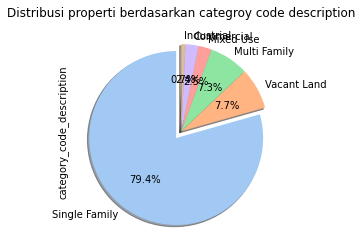

In [6]:
#Grafik sebaran data per masing-masing kategory
colors = sns.color_palette('pastel')[0:7] #pemilihan warna
explode = (0.1, 0, 0, 0, 0, 0)
ax = df['category_code_description'].value_counts().plot(kind='pie',
    colors=colors,
    explode=explode,
    startangle=90,
    autopct='%1.1f%%',
    shadow=True) #ploting pie chart
ax.set_title("Distribusi properti berdasarkan categroy code description")

Berdasarkan hasil pemahaman dataset, properti yang tercatat dalam databes OPA terdapat 6 jenis. Dimana persebaran data mayoritas pada Single family dan 5 kategori sisanya minoritas.

In [7]:
# Cek median market value untuk tiap category code
df_median_price = df.groupby(by=['category_code_description']).agg({'market_value':'median'}).reset_index()
df_median_price = df_median_price.set_index('category_code_description')
df_median_price = df_median_price.sort_values('market_value', ascending =False)
df_median_price.head()

,market_value
category_code_description,
Commercial,423700.0
Industrial,271950.0
Multi Family,201950.0
Mixed Use,157000.0
Single Family,130000.0


Berdasarkan kategori properti, dapat dilihat pebedaan median pada masing-masing kategori properti. Median pada single family 1/4 x dari commercial. Hal ini meyakinkan bahwa market value harus dipisah sesuai kategori properti nya.

In [8]:
#Melihat deskripsi data setiap masing-masing kategori properti.
df_SF = df[df['category_code_description'] == 'Single Family']
df_MF = df[df['category_code_description'] == 'Multi Family']
df_MU = df[df['category_code_description'] == 'Mixed Use']
df_CM = df[df['category_code_description'] == 'Commercial']
df_IS = df[df['category_code_description'] == 'Industrial']
df_VL = df[df['category_code_description'] == 'Vacant Land']

***

### ***2.1 Describe data per kategori***

2.1.1 Describe Data - Single Family

In [9]:
print("Jumlah kolom :", df_SF.shape[1]) # indexing 1
print("Jumlah baris :", df_SF.shape[0]) # indexing 0

Jumlah kolom : 77
Jumlah baris : 461573


In [10]:
df_SF.head(2)

,assessment_date,basements,beginning_point,book_and_page,building_code,building_code_description,category_code,category_code_description,census_tract,central_air,cross_reference,date_exterior_condition,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,fuel,garage_spaces,garage_type,general_construction,geographic_ward,homestead_exemption,house_extension,house_number,interior_condition,location,mailing_address_1,mailing_address_2,mailing_care_of,mailing_city_state,mailing_street,mailing_zip,market_value,market_value_date,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,off_street_open,other_building,owner_1,owner_2,parcel_number,parcel_shape,quality_grade,recording_date,registry_number,sale_date,sale_price,separate_utilities,sewer,site_type,state_code,street_code,street_designation,street_direction,street_name,suffix,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,unit,utility,view_type,year_built,year_built_estimate,zip_code,zoning,objectid,lat,lng
0,NaN,D,S W COR HOWARD,0.0,P50,ROW W/GAR 3 STY MASONRY,1.0,Single Family,700.0,N,NaN,NaN,49.0,113900.0,0.0,5.0,0.0,15.9,NaN,1.0,B,A,1.0,0.0,0.0,108.0,5.0,108 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,186800.0,NaN,2.0,4.0,7.0,0.0,0.0,NaN,PRUSMOWSKI CHARLES L,NaN,11000600,E,NaN,1951-01-31 00:00:00,009S170169,1951-01-31 00:00:00,1.0,NaN,NaN,B,1001.0,82740.0,ST,NaN,WHARTON,NaN,19064.0,53836.0,F,779.0,1650.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681921.0,-75.146866,39.931278
1,NaN,D,15D94 W HOWARD ST,3209422.0,O50,ROW 3 STY MASONRY,1.0,Single Family,710.0,Y,NaN,NaN,49.0,0.0,0.0,2.0,0.0,15.9,NaN,0.0,0,A,1.0,0.0,0.0,110.0,2.0,110 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,341600.0,NaN,1.0,3.0,0.0,0.0,0.0,NaN,SCHMIDT KATHERINE JESSIE,HARRIGAN DEVIN JOHN,11000700,E,NaN,2017-05-09 00:00:00,009S170046,2017-04-14 00:00:00,395000.0,NaN,NaN,NaN,1001.0,82740.0,ST,NaN,WHARTON,NaN,256576.0,85024.0,F,779.1,1203.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681922.0,-75.146921,39.931286


In [11]:
df_describe =[]

for i in df_SF.columns: #mengiterasi i di setiap kolom pada df
    df_describe.append([ #menambahkan hasil i, tipe data, jumlah NaN, persentase nan yang dibulatkan , jumlah unique, unique nya ke dalam list airbnb_describe
        i,
        df_SF[i].dtypes,#tipe
        df_SF[i].isna().sum(),#jumlah NaN
        round((((df_SF[i].isna().sum())/(len(df_SF)))*100),2),#Persentase jumlah NaN
        df_SF[i].nunique(),#Jumlah Unique
        df_SF[i].unique() #Unique
        
    ])

In [12]:
DESC = pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique']) # membuat dataframe dengan data airbnb_describe dengan kolo

In [13]:
DESC

,column,type,nan,nan%,nunique,unique
0,assessment_date,object,461572,100.00,1,"[nan, 1949-01-01 00:00:00]"
1,basements,object,162964,35.31,11,"[D, C, 0, I, A, E, H, G, nan, B, J, F]"
2,beginning_point,object,8880,1.92,343828,"[S W COR HOWARD , 15D94 W HOWARD ST ..."
3,book_and_page,object,633,0.14,405171,"[0.0, 3209422.0, 2448875.0, 3245897.0, 1390593..."
4,building_code,object,0,0.00,283,"[P50 , O50 , R30 , O30 , R70 , P70 , P51..."
5,building_code_description,object,0,0.00,283,"[ROW W/GAR 3 STY MASONRY, ROW 3 STY MASONRY, R..."
6,category_code,float64,0,0.00,1,[1.0]
7,category_code_description,object,0,0.00,1,[Single Family]
8,census_tract,float64,0,0.00,421,"[700.0, 710.0, 770.0, 772.0, 771.0, 711.0, 780..."
9,central_air,object,203716,44.14,3,"[N, Y, nan, 0]"


Insight dari dataset single family

- Dimensi data tipe kategori properti single family berujumlah 461573 rows × 77 columns
- Dari dataset kategori properti Single family kita memahami bahwa terlihat jumlah NaN % yang signifikan di beberapa kolom. Kami akan menghandle missing value berdasarkan jumlah presentase dan kolomnya sehingga strategi Fillna / Drop na dapat lebih tepat pada dataset ini
- Terlihat bahwa fitur properti ini memiliki data kategorik dan numerik. Untuk memasukan kedalam model regresi kami akan mengubah data kategorik menjadi numerik menggunakan transformer

Mari kita cek statistik datanya

In [14]:
df_SF.describe().T #describe yang di transpose kan untuk mengeluarkan summary basic statistcal details pada data


,count,mean,std,min,25%,50%,75%,max
category_code,461573.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
census_tract,461573.0,4.708476e+02,2.893546e+02,0.000000e+00,2.200000e+02,4.500000e+02,7.300000e+02,9.820000e+02
depth,461572.0,7.781496e+01,2.578914e+02,0.000000e+00,5.600000e+01,7.500000e+01,1.000000e+02,1.208830e+05
exempt_building,461573.0,3.545273e+04,9.866524e+04,0.000000e+00,0.000000e+00,3.910000e+04,4.500000e+04,1.626560e+07
exempt_land,461573.0,6.246023e+02,5.232877e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.472461e+06
exterior_condition,461543.0,3.860169e+00,7.249635e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,7.000000e+00
fireplaces,461571.0,3.903841e-02,2.585353e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
frontage,461572.0,9.565997e+02,6.359019e+05,0.000000e+00,1.483000e+01,1.600000e+01,1.991000e+01,4.320260e+08
garage_spaces,461571.0,3.817918e-01,6.757479e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.200000e+01
geographic_ward,455449.0,3.515468e+01,1.930317e+01,1.000000e+00,1.900000e+01,3.600000e+01,5.200000e+01,6.600000e+01


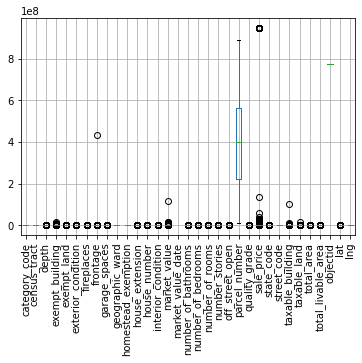

In [15]:
# Plot boxplot untuk mengecek outliers
df_SF.boxplot(rot=90);

Terlihat fitur-fitur lain masih terdapat outlier sehingga membuat rentang data market value jadi sangat besar

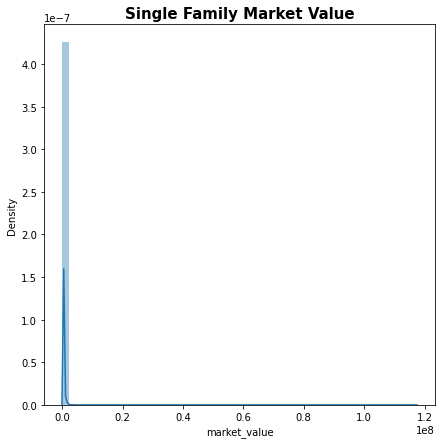

In [16]:
# Plot distribusi fitur 'market value' pada singel family properti
plt.figure(figsize=(7, 7))
sns.distplot(df_SF['market_value'])
plt.title('Single Family Market Value', size=15, weight='bold');

- Berdasarkan data diatas terlihat bahwa fitur market value untuk properti single family terdapat rentang yang sangat besar. Dan terdapat indikasi terdapat oulier yang akan mempengaruhi model regresi nanti. Indikasi ini dapat dilihat dari min - max fitur market value nya.
- Dan terdapat konten market value yang masih tidak wajar, yaitu nilai properti single family dengan nilai 0 sehingga perlu dilakukan EDA untuk memfilter data yang tidak wajar

2.1.2 Describe Data - Multi Familiy

In [17]:
df_MF = df.copy()
df_MF= df[df['category_code_description'] == 'Multi Family']

In [18]:
print("Jumlah kolom :", df_MF.shape[1]) # indexing 1
print("Jumlah baris :", df_MF.shape[0]) # indexing 0

Jumlah kolom : 77
Jumlah baris : 42462


In [19]:
df_MF.head(2)

,assessment_date,basements,beginning_point,book_and_page,building_code,building_code_description,category_code,category_code_description,census_tract,central_air,cross_reference,date_exterior_condition,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,fuel,garage_spaces,garage_type,general_construction,geographic_ward,homestead_exemption,house_extension,house_number,interior_condition,location,mailing_address_1,mailing_address_2,mailing_care_of,mailing_city_state,mailing_street,mailing_zip,market_value,market_value_date,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,off_street_open,other_building,owner_1,owner_2,parcel_number,parcel_shape,quality_grade,recording_date,registry_number,sale_date,sale_price,separate_utilities,sewer,site_type,state_code,street_code,street_designation,street_direction,street_name,suffix,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,unit,utility,view_type,year_built,year_built_estimate,zip_code,zoning,objectid,lat,lng
122,NaN,D,N COR HOWARD,1805253.0,U50,ROW CONV/APT 3 STY MASON,2.0,Multi Family,710.0,N,NaN,2014-11-04 00:00:00,67.0,0.0,0.0,4.0,0.0,60.33,NaN,20.0,A,A,1.0,0.0,25.0,121.0,4.0,121-25 WILDER ST,NaN,NaN,NaN,PHILADELPHIA PA,124 SPRUCE STREET,19106,343300.0,NaN,3.0,2.0,7.0,2.0,0.0,NaN,WOLF ARLEEN L,NaN,11018300,E,NaN,2007-11-08 00:00:00,010S110224,2007-11-07 00:00:00,1.0,NaN,NaN,NaN,1002.0,83180.0,ST,NaN,WILDER,NaN,253355.0,89945.0,F,4042.11,2058.0,H,NaN,NaN,NaN,I,1920.0,Y,191476120,ICMX,774682029.0,-75.147380,39.929220
132,NaN,D,"172'6""W HOWARD",3190226.0,U30,ROW CONV/APT 2 STY MASON,2.0,Multi Family,710.0,N,NaN,2012-02-15 00:00:00,62.7,0.0,0.0,4.0,2.0,16.00,NaN,0.0,0,A,1.0,0.0,0.0,143.0,4.0,143 WILDER ST,NaN,NaN,NaN,CHERRY HILL NJ,16 FOREST HILL DR,08003-1707,270000.0,NaN,2.0,4.0,7.0,2.0,0.0,NaN,PHILLY CAPITAL LLC,NaN,11019200,E,NaN,2017-03-22 00:00:00,010S110117,2017-03-13 00:00:00,143000.0,NaN,NaN,A,1002.0,83180.0,ST,NaN,WILDER,NaN,199791.0,70209.0,F,1003.20,1312.0,A,NaN,NaN,NaN,I,1954.0,Y,191476120,RSA5,774682039.0,-75.147861,39.929366


In [20]:
df_describe =[]

for i in df_MF.columns: #mengiterasi i di setiap kolom pada df
    df_describe.append([ #menambahkan hasil i, tipe data, jumlah NaN, persentase nan yang dibulatkan , jumlah unique, unique nya ke dalam list airbnb_describe
        i,
        df_MF[i].dtypes,#tipe
        df_MF[i].isna().sum(),#jumlah NaN
        round((((df_MF[i].isna().sum())/(len(df_MF)))*100),2),#Persentase jumlah NaN
        df_MF[i].nunique(),#Jumlah Unique
        df_MF[i].unique() #Unique
        
    ])

In [21]:
DESC = pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique']) # membuat dataframe dengan data airbnb_describe dengan kolo

In [22]:
DESC

,column,type,nan,nan%,nunique,unique
0,assessment_date,object,42462,100.00,0,[nan]
1,basements,object,23703,55.82,11,"[D, E, 0, A, C, nan, G, J, I, H, B, F]"
2,beginning_point,object,833,1.96,37411,"[N COR HOWARD , 172'6""W HOWARD ..."
3,book_and_page,object,490,1.15,37361,"[1805253.0, 3190226.0, 1955258.0, 3265658.0, 3..."
4,building_code,object,0,0.00,109,"[U50 , U30 , W70 , W30 , W50 , W56 , U70..."
5,building_code_description,object,0,0.00,108,"[ROW CONV/APT 3 STY MASON, ROW CONV/APT 2 STY ..."
6,category_code,float64,0,0.00,1,[2.0]
7,category_code_description,object,0,0.00,1,[Multi Family]
8,census_tract,float64,0,0.00,273,"[710.0, 780.0, 771.0, 711.0, 772.0, 720.0, 722..."
9,central_air,object,22211,52.31,3,"[N, Y, nan, 0]"


Insight dari dataset Multi Family

- Dimensi data tipe kategori properti Multi family berujumlah 42462 row x 77 col
- Dari dataset kategori properti Multi family kita memahami bahwa terlihat jumlah NaN % yang signifikan di beberapa kolom. Kami akan menghandle missing value berdasarkan jumlah presentase dan kolomnya sehingga strategi Fillna / Drop na dapat lebih tepat pada dataset ini
- Terlihat bahwa fitur properti ini memiliki data kategorik dan numerik. Untuk memasukan kedalam model regresi kami akan mengubah data kategorik menjadi numerik menggunakan transformer

Mari kita cek statistik datanya

In [23]:
df_MF.describe().T #describe yang di transpose kan untuk mengeluarkan summary basic statistcal details pada data


,count,mean,std,min,25%,50%,75%,max
category_code,42462.0,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
census_tract,42462.0,4.773596e+02,2.859843e+02,0.000000e+00,2.300000e+02,4.700000e+02,7.300000e+02,9.820000e+02
depth,42462.0,1.670969e+02,4.689223e+03,0.000000e+00,7.500000e+01,9.500000e+01,1.100000e+02,5.445000e+05
exempt_building,42462.0,1.874625e+05,2.843476e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.712097e+08
exempt_land,42462.0,1.639723e+04,4.548369e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.993072e+07
exterior_condition,42458.0,3.811720e+00,8.490533e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,7.000000e+00
fireplaces,42461.0,1.189327e-02,1.610284e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
frontage,42462.0,2.560899e+03,4.521976e+05,0.000000e+00,1.600000e+01,2.000000e+01,2.841000e+01,9.305651e+07
garage_spaces,42461.0,4.775912e-01,1.844866e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+01
geographic_ward,41282.0,3.553600e+01,1.965420e+01,1.000000e+00,2.000000e+01,3.700000e+01,5.300000e+01,6.600000e+01


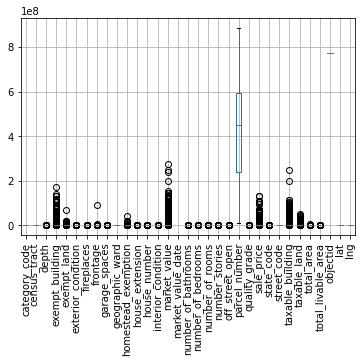

In [24]:
# Plot boxplot untuk mengecek outliers
df_MF.boxplot(rot=90);

Terlihat fitur-fitur lain masih terdapat outlier sehingga membuat rentang data market value jadi sangat besar

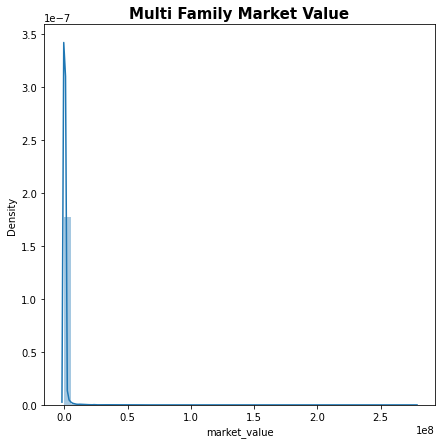

In [25]:
# Plot distribusi fitur 'market value' pada properti multi family 
plt.figure(figsize=(7, 7))
sns.distplot(df_MF['market_value'])
plt.title('Multi Family Market Value', size=15, weight='bold');

- Berdasarkan data diatas terlihat bahwa fitur market value untuk properti multi family terdapat rentang yang sangat besar. Dan terdapat indikasi terdapat oulier yang akan mempengaruhi model regresi nanti. Indikasi ini dapat dilihat dari min - max fitur market value nya.
- Dan grafik masih skewed ke kanan, atau positif dengan rentang market value yang sangat besar. Kita perlu lakukan EDA untuk memfilter data-data ini agar model prediksi lebih baik

2.1.3 Describe Data - Mixed Use

In [26]:
print("Jumlah kolom :", df_MU.shape[1]) # indexing 1
print("Jumlah baris :", df_MU.shape[0]) # indexing 0

Jumlah kolom : 77
Jumlah baris : 14396


In [27]:
df_MU.head(2)

,assessment_date,basements,beginning_point,book_and_page,building_code,building_code_description,category_code,category_code_description,census_tract,central_air,cross_reference,date_exterior_condition,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,fuel,garage_spaces,garage_type,general_construction,geographic_ward,homestead_exemption,house_extension,house_number,interior_condition,location,mailing_address_1,mailing_address_2,mailing_care_of,mailing_city_state,mailing_street,mailing_zip,market_value,market_value_date,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,off_street_open,other_building,owner_1,owner_2,parcel_number,parcel_shape,quality_grade,recording_date,registry_number,sale_date,sale_price,separate_utilities,sewer,site_type,state_code,street_code,street_designation,street_direction,street_name,suffix,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,unit,utility,view_type,year_built,year_built_estimate,zip_code,zoning,objectid,lat,lng
4014,NaN,D,SWC OF 7TH ST,1157922.0,S50,ROW W/OFF STR 3 STY MASON,3.0,Mixed Use,830.0,N,NaN,NaN,65.0,0.0,0.0,4.0,0.0,15.15,NaN,0.0,0,A,1.0,0.0,0.0,700.0,4.0,700 MOORE ST,NaN,NaN,NaN,PHILADELPHIA PA,224-26 N CAMAC ST,19107,230000.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NG GAIL,NaN,12143600,E,NaN,2005-04-19 00:00:00,014S080242,2005-04-13 00:00:00,1.0,B,NaN,B,4303.0,56880.0,ST,NaN,MOORE,NaN,189800.0,40200.0,F,984.75,2655.0,H,NaN,NaN,NaN,I,1915.0,NaN,191481718,CMX1,774686373.0,-75.157530,39.926395
5109,NaN,D,"157'8"" S OF DICKINSON",2163065.0,Y50,STR/OFF+APT 3 STY MASONRY,3.0,Mixed Use,820.0,Y,884340236,NaN,115.0,0.0,0.0,4.0,0.0,14.50,NaN,0.0,0,A,1.0,0.0,0.0,1521.0,4.0,1521 S 8TH ST,NaN,NaN,NaN,BRYN MAWR PA,824 GATEMORE RD,19010,250000.0,NaN,1.0,4.0,7.0,0.0,0.0,NaN,TERMINI VINCENT A SR TR,TERMINI BARBARA TR,12095905,E,NaN,2010-01-05 00:00:00,011S120143,2009-04-23 00:00:00,1.0,NaN,NaN,NaN,4302.0,87960.0,ST,S,08TH,NaN,212500.0,37500.0,F,1667.50,2625.0,A,NaN,NaN,NaN,I,1915.0,Y,191476401,RSA5,774685979.0,-75.157945,39.929843


In [28]:
df_describe =[]

for i in df_MU.columns: #mengiterasi i di setiap kolom pada df
    df_describe.append([ #menambahkan hasil i, tipe data, jumlah NaN, persentase nan yang dibulatkan , jumlah unique, unique nya ke dalam list airbnb_describe
        i,
        df_MU[i].dtypes,#tipe
        df_MU[i].isna().sum(),#jumlah NaN
        round((((df_MU[i].isna().sum())/(len(df_MU)))*100),2),#Persentase jumlah NaN
        df_MU[i].nunique(),#Jumlah Unique
        df_MU[i].unique() #Unique
        
    ])

In [29]:
DESC = pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique']) # membuat dataframe dengan data airbnb_describe dengan kolo

In [30]:
DESC

,column,type,nan,nan%,nunique,unique
0,assessment_date,object,14396,100.00,0,[nan]
1,basements,object,8482,58.92,11,"[D, I, nan, A, H, C, F, 0, B, J, G, E]"
2,beginning_point,object,54,0.38,11980,"[SWC OF 7TH ST , 157'8"" S OF DICKIN..."
3,book_and_page,object,44,0.31,13149,"[1157922.0, 2163065.0, 3347176.0, 458717.0, 16..."
4,building_code,object,0,0.00,82,"[S50 , Y50 , S40 , T30 , M30 , T50 , T31..."
5,building_code_description,object,0,0.00,82,"[ROW W/OFF STR 3 STY MASON, STR/OFF+APT 3 STY ..."
6,category_code,float64,0,0.00,1,[3.0]
7,category_code_description,object,0,0.00,1,[Mixed Use]
8,census_tract,float64,0,0.00,228,"[830.0, 820.0, 811.0, 631.0, 381.0, 520.0, 380..."
9,central_air,object,9150,63.56,2,"[N, Y, nan]"


Insight dari dataset properti Mixed Use

- Dimensi data tipe kategori properti Mixed Use berujumlah 14396 row x 77 col
- Dari dataset kategori properti Mixed Use kita memahami bahwa terlihat jumlah NaN % yang signifikan di beberapa kolom. Kami akan menghandle missing value berdasarkan jumlah presentase dan kolomnya sehingga strategi Fillna / Drop na dapat lebih tepat pada dataset ini
- Terlihat bahwa fitur properti ini memiliki data kategorik dan numerik. Untuk memasukan kedalam model regresi kami akan mengubah data kategorik menjadi numerik menggunakan transformer

Mari kita cek statistiknya

In [31]:
df_MU.describe().T #describe yang di transpose kan untuk mengeluarkan summary basic statistcal details pada data


,count,mean,std,min,25%,50%,75%,max
category_code,14396.0,3.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
census_tract,14396.0,4.790566e+02,2.889027e+02,0.000000e+00,2.200000e+02,4.700000e+02,7.300000e+02,9.820000e+02
depth,14396.0,8.504796e+01,3.836182e+02,0.000000e+00,6.200000e+01,7.500000e+01,9.400000e+01,4.402300e+04
exempt_building,14396.0,1.574996e+04,7.984287e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.295678e+06
exempt_land,14396.0,5.629774e+02,7.590859e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.494110e+05
exterior_condition,14390.0,4.121821e+00,8.334621e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,7.000000e+00
fireplaces,14396.0,5.070853e-03,1.002359e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
frontage,14396.0,2.454701e+01,2.908228e+02,0.000000e+00,1.600000e+01,1.701500e+01,2.000000e+01,3.400400e+04
garage_spaces,14396.0,7.682690e-02,3.745118e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01
geographic_ward,14141.0,2.925868e+01,1.795996e+01,1.000000e+00,1.300000e+01,3.100000e+01,4.200000e+01,6.600000e+01


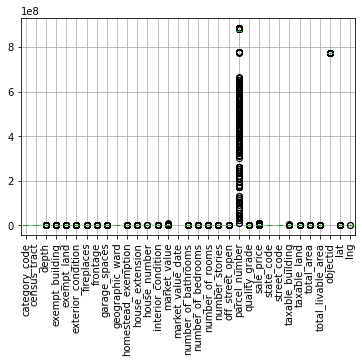

In [32]:
# Plot boxplot untuk mengecek outliers
df_MU.boxplot(rot=90);

Teridentifikasi outlier yang sangat banyak pada fitur lain yang dapat menyebabkan prediksi market value dapat kurang baik

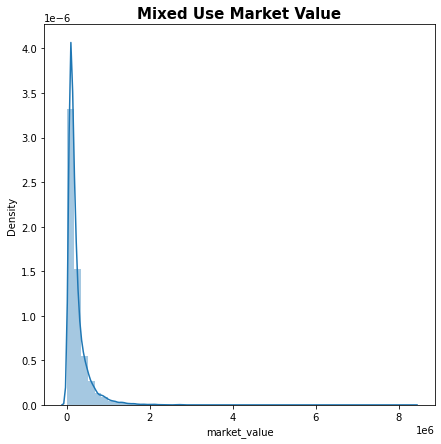

In [33]:
# Plot distribusi fitur 'market value' pada properti mixed use
plt.figure(figsize=(7, 7))
sns.distplot(df_MU['market_value'])
plt.title('Mixed Use Market Value', size=15, weight='bold');

- Berdasarkan data diatas terlihat bahwa fitur market value untuk properti mixed used terdapat rentang yang sangat besar. Dan terdapat indikasi terdapat oulier yang akan mempengaruhi model regresi nanti. Indikasi ini dapat dilihat dari min - max fitur market value nya.
- Dan grafik masih skewed ke kanan, atau positif dengan rentang market value yang sangat besar. Kita perlu lakukan EDA untuk memfilter data-data ini agar model prediksi lebih baik

2.1.4 Describe Data - Commercial

In [34]:
print("Jumlah kolom :", df_CM.shape[1]) # indexing 1
print("Jumlah baris :", df_CM.shape[0]) # indexing 0

Jumlah kolom : 77
Jumlah baris : 14059


In [35]:
df_CM.head(2)

,assessment_date,basements,beginning_point,book_and_page,building_code,building_code_description,category_code,category_code_description,census_tract,central_air,cross_reference,date_exterior_condition,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,fuel,garage_spaces,garage_type,general_construction,geographic_ward,homestead_exemption,house_extension,house_number,interior_condition,location,mailing_address_1,mailing_address_2,mailing_care_of,mailing_city_state,mailing_street,mailing_zip,market_value,market_value_date,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,off_street_open,other_building,owner_1,owner_2,parcel_number,parcel_shape,quality_grade,recording_date,registry_number,sale_date,sale_price,separate_utilities,sewer,site_type,state_code,street_code,street_designation,street_direction,street_name,suffix,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,unit,utility,view_type,year_built,year_built_estimate,zip_code,zoning,objectid,lat,lng
2970,NaN,D,"64'6"" W 5 ST",519558.0,ZV0,MISC DAY CARE MASONRY,4.0,Commercial,741.0,Y,882110005,NaN,110.0,517500.0,175000.0,4.0,0.0,63.5,NaN,0.0,0,A,1.0,0.0,10.0,504.0,4.0,504-10 MORRIS ST,STE 100,NaN,NaN,BLUE BELL PA,960 A HARVEST DR,19422,692500.0,NaN,0.0,0.0,0.0,3.0,0.0,NaN,KEN-CREST SERVICES,NaN,11367601,E,NaN,2002-08-30 00:00:00,013S080320,2002-08-27 00:00:00,142500.0,NaN,NaN,A,9904.0,57100.0,ST,NaN,MORRIS,NaN,0.0,0.0,F,6985.0,11080.0,H,NaN,NaN,NaN,I,1915.0,NaN,191481225,CMX2,774684458.0,-75.154463,39.927179
13836,NaN,NaN,NES 2ND & CHRISTIAN,3014489.0,MD0,SHOP CENT STRIP MASONRY,4.0,Commercial,720.0,NaN,882303200.0,NaN,0.0,0.0,0.0,4.0,0.0,0.0,NaN,0.0,NaN,A,NaN,0.0,51.0,841.0,4.0,841-51 S 02ND ST,NaN,NaN,NaN,PHILADELPHIA PA,822 PINE STREET,19107,865200.0,NaN,0.0,0.0,0.0,1.0,14.0,NaN,BECK STREET LLC,NaN,22128905,NaN,3.0,2016-08-29 00:00:00,005S150538,2016-08-25 00:00:00,1.0,NaN,Y,NaN,3005.0,87840.0,ST,S,02ND,NaN,692096.0,173104.0,NaN,0.0,0.0,NaN,NaN,NaN,A,NaN,1970.0,Y,19147,CMX2,774694545.0,-75.146494,39.936182


In [36]:
df_describe =[]

for i in df_CM.columns: #mengiterasi i di setiap kolom pada df
    df_describe.append([ #menambahkan hasil i, tipe data, jumlah NaN, persentase nan yang dibulatkan , jumlah unique, unique nya ke dalam list airbnb_describe
        i,
        df_CM[i].dtypes,#tipe
        df_CM[i].isna().sum(),#jumlah NaN
        round((((df_CM[i].isna().sum())/(len(df_CM)))*100),2),#Persentase jumlah NaN
        df_CM[i].nunique(),#Jumlah Unique
        df_CM[i].unique() #Unique
        
    ])

In [37]:
DESC = pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique']) # membuat dataframe dengan data airbnb_describe dengan kolo

In [38]:
DESC

,column,type,nan,nan%,nunique,unique
0,assessment_date,object,14059,100.00,0,[nan]
1,basements,object,12133,86.30,10,"[D, nan, J, H, A, 0, I, C, B, F, E]"
2,beginning_point,object,322,2.29,11664,"[64'6"" W 5 ST , NES 2ND & CHRISTIA..."
3,book_and_page,object,1075,7.65,10068,"[519558.0, 3014489.0, 3136761.0, 0226734, 1732..."
4,building_code,object,0,0.00,274,"[ZV0 , MD0 , PB0 , BC0 , ZD0 , OA0 , ID0..."
5,building_code_description,object,0,0.00,271,"[MISC DAY CARE MASONRY, SHOP CENT STRIP MASONR..."
6,category_code,float64,0,0.00,1,[4.0]
7,category_code_description,object,0,0.00,1,[Commercial]
8,census_tract,float64,0,0.00,318,"[741.0, 720.0, 83.0, 530.0, 10.0, 1.0, 932.0, ..."
9,central_air,object,11871,84.44,3,"[Y, nan, N, 0]"


Insight dari dataset properti Commercial

- Dimensi data tipe kategori properti Commercial berujumlah 14059 row x 77 col
- Dari dataset kategori properti Commercial kita memahami bahwa terlihat jumlah NaN % yang signifikan di beberapa kolom. Kami akan menghandle missing value berdasarkan jumlah presentase dan kolomnya sehingga strategi Fillna / Drop na dapat lebih tepat pada dataset ini
- Terlihat bahwa fitur properti ini memiliki data kategorik dan numerik. Untuk memasukan kedalam model regresi kami akan mengubah data kategorik menjadi numerik menggunakan transformer

Mari kita cek statistiknya

In [39]:
df_CM.describe().T #describe yang di transpose kan untuk mengeluarkan summary basic statistcal details pada data


,count,mean,std,min,25%,50%,75%,max
category_code,14059.0,4.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
census_tract,14059.0,4.786929e+02,2.807552e+02,0.000000e+00,2.300000e+02,5.000000e+02,7.200000e+02,9.820000e+02
depth,14058.0,8.962100e+02,2.487598e+04,0.000000e+00,7.550000e+01,1.090000e+02,1.748775e+02,1.829520e+06
exempt_building,14059.0,1.404513e+06,1.012187e+07,0.000000e+00,0.000000e+00,0.000000e+00,9.202300e+04,4.304176e+08
exempt_land,14059.0,4.237616e+05,4.883938e+06,0.000000e+00,0.000000e+00,0.000000e+00,2.387300e+04,3.418426e+08
exterior_condition,14043.0,3.738375e+00,1.194120e+00,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,7.000000e+00
fireplaces,14048.0,1.637244e-03,6.140331e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
frontage,14058.0,5.510745e+03,4.686223e+05,0.000000e+00,2.133000e+01,6.000000e+01,1.382375e+02,5.522689e+07
garage_spaces,14048.0,2.675114e-01,2.798858e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.700000e+01
geographic_ward,13380.0,3.057175e+01,1.984951e+01,1.000000e+00,1.100000e+01,3.100000e+01,4.700000e+01,6.600000e+01


<AxesSubplot:>

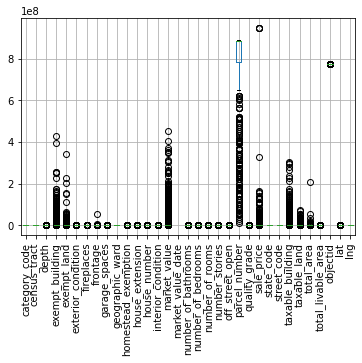

In [40]:
# Plot boxplot untuk mengecek outliers
df_CM.boxplot(rot=90)

Terdapat outlier yang sangat besar pada market value, hal ini dapat mengakibatkan model prediksi jadi salah

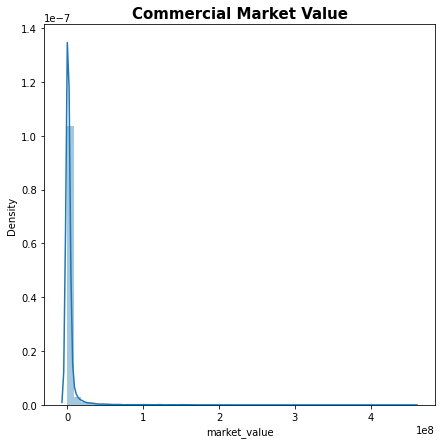

In [41]:
# Plot distribusi fitur 'market value' pada properti Commercial
plt.figure(figsize=(7, 7))
sns.distplot(df_CM['market_value'])
plt.title('Commercial Market Value', size=15, weight='bold');

- Berdasarkan data diatas terlihat bahwa fitur market value untuk properti commercial terdapat rentang yang sangat besar. Dan terdapat indikasi terdapat oulier yang akan mempengaruhi model regresi nanti. Indikasi ini dapat dilihat dari min - max fitur market value nya.
- Dan grafik masih skewed ke kanan, atau positif dengan rentang market value yang sangat besar. Kita perlu lakukan EDA untuk memfilter data-data ini agar model prediksi lebih baik

2.1.5 Describe Data - Industrial

In [42]:
print("Jumlah kolom :", df_IS.shape[1]) # indexing 1
print("Jumlah baris :", df_IS.shape[0]) # indexing 0

Jumlah kolom : 77
Jumlah baris : 4354


Insight dari dataset properti Industrial

- Dimensi data tipe kategori properti Commercial berujumlah 4354 row x 77 col
- Dari dataset kategori properti Industrial kita memahami bahwa terlihat jumlah NaN % yang signifikan di beberapa kolom. Kami akan menghandle missing value berdasarkan jumlah presentase dan kolomnya sehingga strategi Fillna / Drop na dapat lebih tepat pada dataset ini
- Terlihat bahwa fitur properti ini memiliki data kategorik dan numerik. Untuk memasukan kedalam model regresi kami akan mengubah data kategorik menjadi numerik menggunakan transformer

In [43]:
df_describe =[]

for i in df_IS.columns: #mengiterasi i di setiap kolom pada df
    df_describe.append([ #menambahkan hasil i, tipe data, jumlah NaN, persentase nan yang dibulatkan , jumlah unique, unique nya ke dalam list airbnb_describe
        i,
        df_IS[i].dtypes,#tipe
        df_IS[i].isna().sum(),#jumlah NaN
        round((((df_IS[i].isna().sum())/(len(df_IS)))*100),2),#Persentase jumlah NaN
        df_IS[i].nunique(),#Jumlah Unique
        df_IS[i].unique() #Unique
        
    ])

In [44]:
DESC = pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique']) # membuat dataframe dengan data airbnb_describe dengan kolo

In [45]:
DESC

,column,type,nan,nan%,nunique,unique
0,assessment_date,object,4354,100.00,0,[nan]
1,basements,object,4035,92.67,7,"[nan, 0, C, D, J, H, F, I]"
2,beginning_point,object,117,2.69,4039,"[300'W OF 60TH ST , 220'1 3/4""W OF 61S..."
3,book_and_page,object,70,1.61,3705,"[2876546.0, 1294807, 2817726, 2162652, 3073361..."
4,building_code,object,0,0.00,44,"[LC0 , LU0 , LE0 , LD0 , LC1 , LD1 , LC6..."
5,building_code_description,object,0,0.00,44,"[IND WAREHOUSE MASONRY, IND BLDG MINI WHSE MAS..."
6,category_code,float64,0,0.00,1,[5.0]
7,category_code_description,object,0,0.00,1,[Industrial]
8,census_tract,float64,0,0.00,238,"[330.0, 83.0, 250.0, 740.0, 630.0, 640.0, 641...."
9,central_air,object,4049,92.99,2,"[nan, N, Y]"


Mari kita cek statistiknya

In [46]:
df_IS.describe().T #describe yang di transpose kan untuk mengeluarkan summary basic statistcal details pada data


,count,mean,std,min,25%,50%,75%,max
category_code,4354.0,5.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
census_tract,4354.0,4.971346e+02,2.836203e+02,0.000000e+00,2.510000e+02,5.100000e+02,7.300000e+02,9.820000e+02
depth,4354.0,3.436456e+02,6.036091e+03,0.000000e+00,8.000000e+01,1.160000e+02,2.250000e+02,2.992900e+05
exempt_building,4354.0,1.557775e+05,2.088137e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.045392e+08
exempt_land,4354.0,5.500311e+04,6.099327e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.118594e+07
exterior_condition,4352.0,4.081801e+00,9.402854e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,7.000000e+00
fireplaces,4354.0,1.148369e-03,7.577497e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
frontage,4354.0,6.689073e+02,1.357927e+04,0.000000e+00,3.484000e+01,7.200000e+01,1.850000e+02,7.601123e+05
garage_spaces,4354.0,4.175471e-01,2.705250e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.700000e+01
geographic_ward,4136.0,3.179884e+01,1.841467e+01,1.000000e+00,1.800000e+01,3.200000e+01,4.500000e+01,6.600000e+01


<AxesSubplot:>

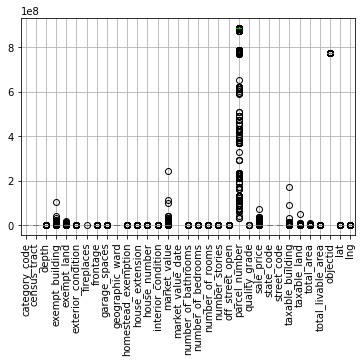

In [47]:
#Plot outlier
df_IS.boxplot(rot=90)

terlihat masih terdapat outlier pada market value, dan fitur lain yang menyebabkan data market value perlu dilakukan EDA

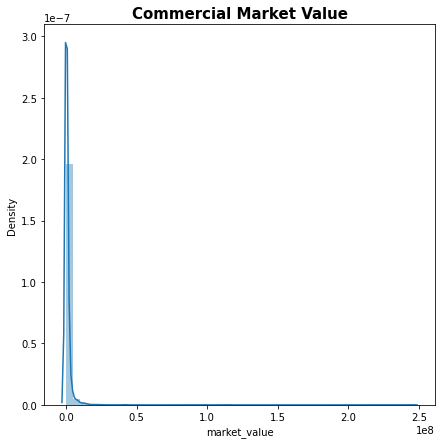

In [48]:
# Plot distribusi fitur 'market value' pada properti Commercial
plt.figure(figsize=(7, 7))
sns.distplot(df_IS['market_value'])
plt.title('Commercial Market Value', size=15, weight='bold');

- Berdasarkan data diatas terlihat bahwa fitur market value untuk properti industrial terdapat rentang yang sangat besar. Dan terdapat indikasi terdapat oulier yang akan mempengaruhi model regresi nanti. Indikasi ini dapat dilihat dari min - max fitur market value nya.
- Dan grafik masih skewed ke kanan, atau positif dengan rentang market value yang sangat besar. Kita perlu lakukan EDA untuk memfilter data-data ini agar model prediksi lebih baik

2.6 Describe Data - Vacant Land

In [49]:
print("Jumlah kolom :", df_VL.shape[1]) # indexing 1
print("Jumlah baris :", df_VL.shape[0]) # indexing 0

Jumlah kolom : 77
Jumlah baris : 44612


In [50]:
df_describe =[]

for i in df_VL.columns: #mengiterasi i di setiap kolom pada df
    df_describe.append([ #menambahkan hasil i, tipe data, jumlah NaN, persentase nan yang dibulatkan , jumlah unique, unique nya ke dalam list airbnb_describe
        i,
        df_VL[i].dtypes,#tipe
        df_VL[i].isna().sum(),#jumlah NaN
        round((((df_VL[i].isna().sum())/(len(df_VL)))*100),2),#Persentase jumlah NaN
        df_VL[i].nunique(),#Jumlah Unique
        df_VL[i].unique() #Unique
        
    ])

In [51]:
DESC = pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique']) # membuat dataframe dengan data airbnb_describe dengan kolo

In [52]:
DESC

,column,type,nan,nan%,nunique,unique
0,assessment_date,object,44480,99.70,1,"[nan, 1949-01-01 00:00:00]"
1,basements,object,44568,99.90,7,"[nan, 0, D, E, A, H, J, C]"
2,beginning_point,object,966,2.17,40114,"[SW COR PHILIP ST , 74'9"" WAMERICAN ST..."
3,book_and_page,object,464,1.04,30033,"[0.0, 1924138.0, 3333744.0, 3343011.0, 589238...."
4,building_code,object,0,0.00,10,"[SR , RA , SC , RB , SI , SS , SD ..."
5,building_code_description,object,0,0.00,10,"[VACANT LAND RESIDE < ACRE, PKG LOT NON COMMER..."
6,category_code,float64,0,0.00,1,[6.0]
7,category_code_description,object,0,0.00,1,[Vacant Land]
8,census_tract,float64,0,0.00,514,"[770.0, 710.0, 27.0, 771.0, 780.0, 711.0, 772...."
9,central_air,object,44599,99.97,2,"[nan, N, Y]"


Insight dari dataset properti Vacant Land

- Dimensi data tipe kategori properti Vacant Land berujumlah 44612 row x 77 col
- Dari dataset kategori properti Vacant Land kita memahami bahwa terlihat jumlah NaN % yang signifikan di beberapa kolom. Kami akan menghandle missing value berdasarkan jumlah presentase dan kolomnya sehingga strategi Fillna / Drop na dapat lebih tepat pada dataset ini
- Terlihat bahwa fitur properti ini memiliki data kategorik dan numerik. Untuk memasukan kedalam model regresi kami akan mengubah data kategorik menjadi numerik menggunakan transformer

In [53]:
df_VL.describe().T #describe yang di transpose kan untuk mengeluarkan summary basic statistcal details pada data


,count,mean,std,min,25%,50%,75%,max
category_code,44612.0,6.000000e+00,0.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
census_tract,44612.0,3.786502e+02,2.708470e+02,0.000000e+00,1.550000e+02,2.960000e+02,5.700000e+02,9.810000e+02
depth,44612.0,1.402956e+02,4.158596e+03,0.000000e+00,4.900000e+01,6.500000e+01,8.962000e+01,5.588480e+05
exempt_building,44612.0,6.682944e+01,6.476710e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.144025e+06
exempt_land,44612.0,5.351062e+04,8.347101e+05,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+03,7.551300e+07
exterior_condition,19405.0,6.493172e-03,1.876387e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
fireplaces,44605.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
frontage,44612.0,1.709687e+02,7.905846e+03,0.000000e+00,1.400000e+01,1.600000e+01,2.000000e+01,1.124841e+06
garage_spaces,44605.0,3.811232e-04,4.897696e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
geographic_ward,43054.0,2.750070e+01,1.481475e+01,1.000000e+00,1.700000e+01,2.800000e+01,3.700000e+01,6.600000e+01


<AxesSubplot:>

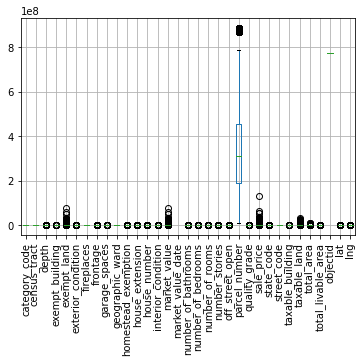

In [54]:
#Plot outlier
df_VL.boxplot(rot=90)

terlihat masih terdapat outlier pada market value, dan fitur lain yang menyebabkan data market value perlu dilakukan EDA

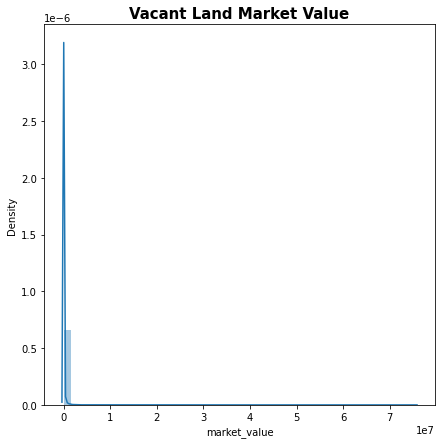

In [55]:
# Plot distribusi fitur 'market value' pada properti Vacant Land
plt.figure(figsize=(7, 7))
sns.distplot(df_VL['market_value'])
plt.title('Vacant Land Market Value', size=15, weight='bold');

- Berdasarkan data diatas terlihat bahwa fitur market value untuk properti Vacant land terdapat rentang yang sangat besar. Dan terdapat indikasi terdapat oulier yang akan mempengaruhi model regresi nanti. Indikasi ini dapat dilihat dari min - max fitur market value nya.
- Dan grafik masih skewed ke kanan, atau positif dengan rentang market value yang sangat besar. Kita perlu lakukan EDA untuk memfilter data-data ini agar model prediksi lebih baik

In [56]:
print(df.duplicated().sum()) #menghitung duplicated value
df = df.drop_duplicates() # drop duplicated value

0


***

Hasil temuan dari Data Undestanding :
- Dalam menjawab permasalahan OPA, dapat dilihat bahwa kasus penentuan market value adalah pemodelan dengan regresi. Dimana target adalah market value.
- Kategori setiap properti harus dipisah dalam pemodelan karena rentang data market value tidak sama. Karena Data kategori single family jumlahnya sangat signifikan. Oleh karena itu, kami memutuskan untuk membuat pemodelan pada properti kategori single family. Hal ini berkaitan juga dengan domain knowledge dimana OPA akan mengimplementasikan ML pada properti mayoritas di Kota Philadelphia sehingga prediksi market value lebih tepat sasaran.
- Untuk data yang NaN strategi kami adalah mengisi dengan: Domain knowledge sesuai report OPA, Drop Data, Mengisi NaN dengan Data Lain, Mengisi NaN dengan Median, Mengisi NaN dengan Modus, Dummy Variable
- Normalized market value dengan log untuk mengecek distribusinya

***

Dilanjutkan dengan EDA dan Data Cleaning